<a href="https://colab.research.google.com/github/baeldin/strass_preview_generator/blob/main/strass_band_generator_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import urllib.request
import numpy as np
import copy

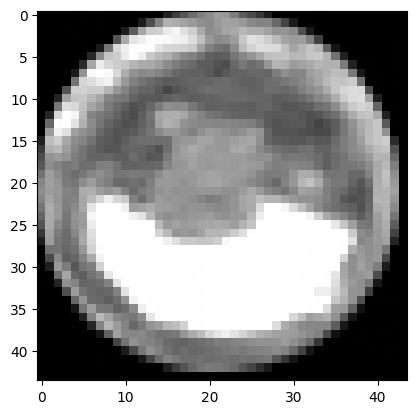

In [3]:
# bild laden
urlstring = "https://raw.githubusercontent.com/baeldin/strass_preview_generator/main/strass_single_even.png"

req = urllib.request.urlopen(urlstring)
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_stone = cv2.imdecode(arr, -1)# 'Load it as it is'
# show stone, just for testing purposes
plt.imshow(img_stone)

23 34
[241.13, 179.74]
[240.26, 182.2]
[245.25, 189.36]
[245.26, 186.62]
[245.26, 184.01]
[239.1, 159.01]
[241.53, 157.69]
[244.13, 158.11]
[245.73, 160.17]
[244.73, 162.6]
[242.15, 163.11]
{'A': array([[4.        , 1.73630832],
       [0.        , 3.47667343],
       [1.01419878, 3.07505071],
       [2.02839757, 2.67342799],
       [3.03853955, 2.27180527],
       [0.        , 0.        ],
       [1.01419878, 0.40162272],
       [2.02839757, 0.80324544],
       [3.03853955, 1.20486815],
       [1.31034483, 1.73630832]]), 'B': array([[1.97853659, 2.00585366],
       [4.        , 0.        ],
       [0.        , 0.        ],
       [0.99902439, 0.        ],
       [1.99804878, 0.        ],
       [2.99707317, 0.        ],
       [1.99804878, 1.01463415],
       [1.08487805, 2.45073171],
       [0.15609756, 2.0995122 ],
       [0.        , 1.01463415],
       [2.91121951, 2.45073171],
       [3.86731707, 2.07609756],
       [4.        , 1.01463415]]), 'C': array([[0.4137931 , 2.90804598]

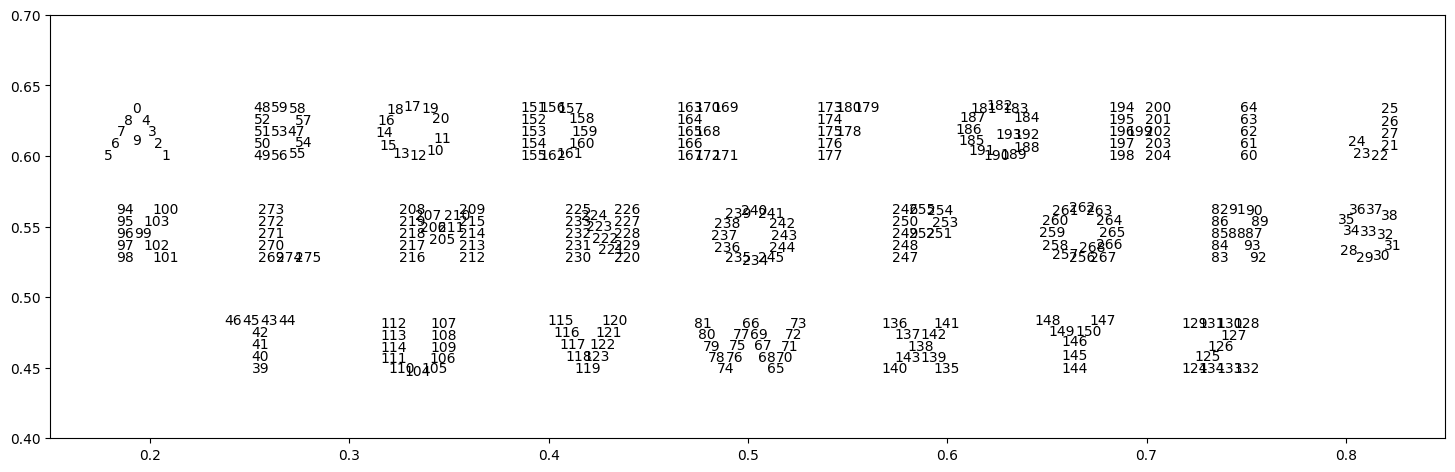

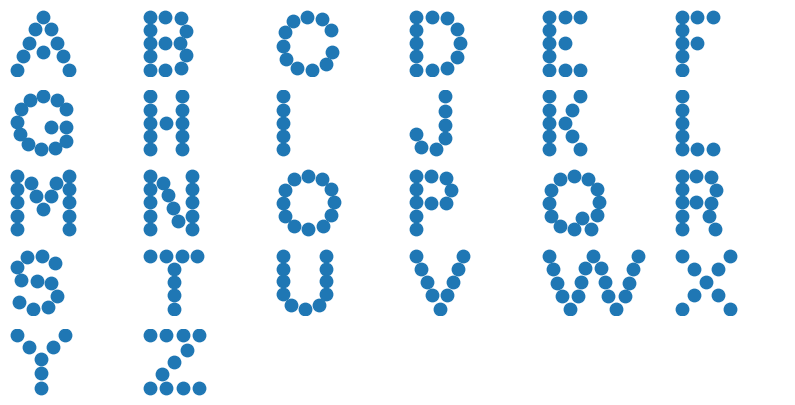

In [5]:
import pandas as pd
req = urllib.request.urlopen("https://raw.githubusercontent.com/baeldin/strass_preview_generator/main/Alphabet.asc")
df = pd.read_csv("https://raw.githubusercontent.com/baeldin/strass_preview_generator/main/Alphabet.asc", delimiter=";", header=None, skiprows=3)
fig, ax = plt.subplots(1,1, figsize=(18,5.5))
#ax.scatter(df[2], df[3], c=df.index, cmap='nipy_spectral')


for idx, row in df.iterrows():
  ax.text(row[2]/300., row[3]/300., str(idx))
ax.set_xlim([0.15, 0.85])
ax.set_ylim([0.4, 0.7])

number_of_points = np.array([10, 13, 11, 12, 10, 8, 13, 11, 5, 7, 10, 7,
                             15, 14, 12, 10, 13, 12, 11, 9, 11, 9, 17,
                             9, 7, 11], dtype = int)

ii = 2

idx_start = number_of_points[0:ii].sum()
idx_end = number_of_points[0:ii+1].sum()

print(idx_start, idx_end)
xa = df[2][idx_start:idx_end].values
ya = df[3][idx_start:idx_end].values

height = ya.max() - ya.min()
scale = 4 / height

leter_indices = {
    'A': [0, 9],
    'B': [47, 59],
    'C': [10, 20],
    'D': [151, 162],
    'E': [163, 172],
    'F': [173, 180],
    'G': [181, 193],
    'H': [194, 204],
    'I': [60, 64],
    'J': [21, 27],
    'K': [94, 103],
    'L': [269, 275],
    'M': [205, 219],
    'N': [220, 233],
    'O': [234, 245],
    'P': [246, 255],
    'Q': [256, 268],
    'R': [82, 93],
    'S': [28, 38],
    'T': [39, 46],
    'U': [104, 114],
    'V': [115, 123],
    'W': [65, 81],
    'X': [135, 143],
    'Y': [144, 150],
    'Z': [124, 134]}

for x, y in zip(xa, ya):
  print([x, y])

fig, ax = plt.subplots(5, 6, figsize=(10,5))
ii = 0
for key, item in leter_indices.items():
  dots_x = df[2][leter_indices[key][0]:leter_indices[key][1]+1]
  dots_y = df[3][leter_indices[key][0]:leter_indices[key][1]+1]
  scale = 4. / (dots_y.max() - dots_y.min())
  dots_x = (dots_x - dots_x.min()) * scale
  dots_y = (dots_y - dots_y.min()) * scale
  ax.flatten()[ii].scatter(dots_x, dots_y, s=80.)
  ax.flatten()[ii].set_xlim([-0.5, 7.])
  ax.flatten()[ii].set_ylim([-0.5, 4.5])
  ax.flatten()[ii].axis('off')
  ii = ii + 1

#for url_string in urllist:
#    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)

letters_new = {}
for key, item in leter_indices.items():
  letter_list = []
  for ii in range(item[0], item[1]+1):
    letter_list.append([df[3][ii], df[2][ii]])
  tmp_arr = np.array(letter_list)
  scale = 4. / (tmp_arr[:,0].max() - tmp_arr[:,0].min())
  tmp_arr[:,0] = (tmp_arr[:,0] - tmp_arr[:,0].min()) * scale
  tmp_arr[:,1] = (tmp_arr[:,1] - tmp_arr[:,1].min()) * scale
  letters_new[key] = tmp_arr

print(letters_new)

for ii in range(26, 30):
  ax.flatten()[ii].axis('off')
plt.show()

Offsettting A by 112 pixels, will insert 2 solid columns before letter
Offsettting B by 157 pixels, will insert 3 solid columns before letter
Offsettting C by 118 pixels, will insert 2 solid columns before letter
Offsettting D by 134 pixels, will insert 3 solid columns before letter
Offsettting E by 170 pixels, will insert 3 solid columns before letter
Offsettting F by 170 pixels, will insert 3 solid columns before letter
Offsettting G by 119 pixels, will insert 2 solid columns before letter
Offsettting H by 170 pixels, will insert 3 solid columns before letter
Offsettting I by 265 pixels, will insert 6 solid columns before letter
Offsettting J by 177 pixels, will insert 4 solid columns before letter
Offsettting K by 170 pixels, will insert 3 solid columns before letter
Offsettting L by 171 pixels, will insert 3 solid columns before letter
Offsettting M by 110 pixels, will insert 2 solid columns before letter
Offsettting N by 139 pixels, will insert 3 solid columns before letter
Offset

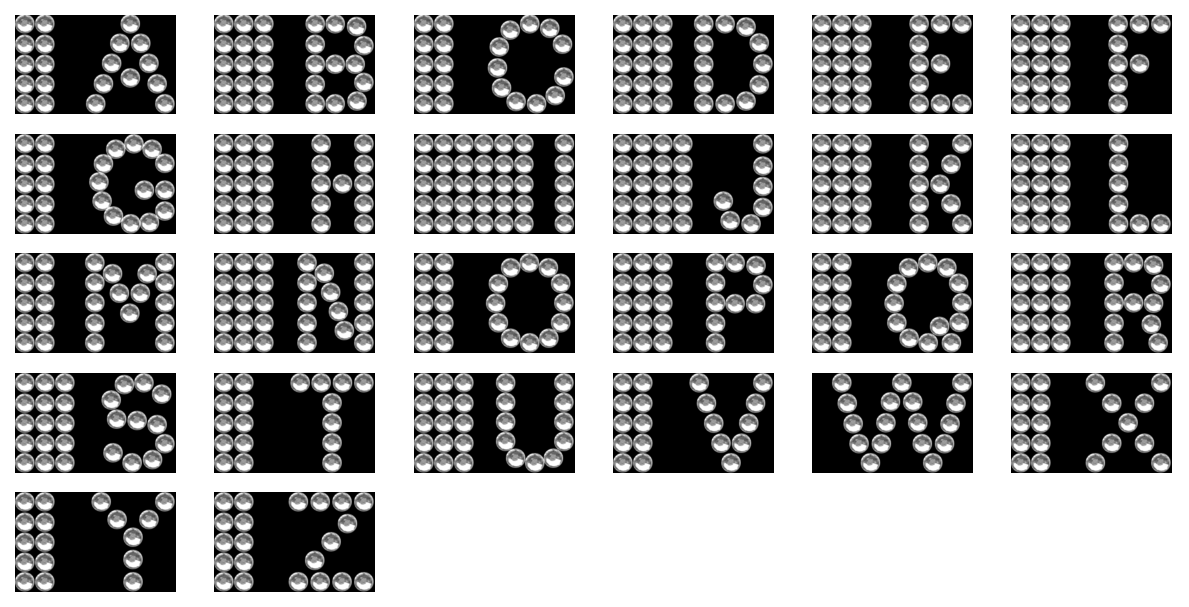

In [10]:
alphabet_left = []

flipped_stone = np.flip(img_stone, axis=0)

char_max = "void"
dimx_max = 0
for draw in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
             'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']:
# loop over stone coordinates in letter and add stones to image
  dimy = 5 * 44
  dimx = 1 + int(np.ceil(44 * (1 + letters_new[draw][:,1].max()) - np.floor(letters_new[draw][:,1].min())))
  dimx_max = dimx if dimx > dimx_max else dimx_max
  char_max = draw if dimx > dimx_max else char_max

for draw in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
             'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']:
# loop over stone coordinates in letter and add stones to image
  dimy = 5 * 44
  dimx = 1 + int(np.ceil(44 * (1 + letters_new[draw][:,1].max()) - np.floor(letters_new[draw][:,1].min())))
  dimx_offset = dimx_max - dimx
  padding_columns = int(np.floor(dimx_offset/44.))
  print("Offsettting " + draw + " by {:d} pixels, will insert {:d} solid columns before letter".format(dimx_offset, padding_columns))
  new_img = np.zeros((dimy, dimx_max + 44, 3), dtype=int)
  for dot in range(letters_new[draw].shape[0]):
    doty, dotx = letters_new[draw][dot, :]
    for xx in range(44):
      for yy in range(44):
        new_img[int(44 * doty + yy), int(44 * dotx + xx) + 44 + dimx_offset, :] += flipped_stone[yy, xx, 0]
  for ii in range(padding_columns):
    for dot in range(letters_new['I'].shape[0]):
      doty, dotx = letters_new['I'][dot, :]
      for xx in range(44):
        for yy in range(44):
          new_img[int(44 * doty + yy), int(44 * dotx + xx + 44 * ii), :] += flipped_stone[yy, xx, 0]
  new_img = np.flip(new_img, axis=0)
  alphabet_left.append(new_img)


fig, ax = plt.subplots(5, 6, figsize=(10,5), dpi=150)
for ii, letter in enumerate(alphabet_left):
  ax.flatten()[ii].imshow(letter)
  ax.flatten()[ii].axis('off')

for ii in range(26, 30):
  ax.flatten()[ii].axis('off')

plt.show()
plt.close('all')

Offsettting A by 112 pixels, will insert 2 solid columns after letter
Offsettting B by 157 pixels, will insert 3 solid columns after letter
Offsettting C by 118 pixels, will insert 2 solid columns after letter
Offsettting D by 134 pixels, will insert 3 solid columns after letter
Offsettting E by 170 pixels, will insert 3 solid columns after letter
Offsettting F by 170 pixels, will insert 3 solid columns after letter
Offsettting G by 119 pixels, will insert 2 solid columns after letter
Offsettting H by 170 pixels, will insert 3 solid columns after letter
Offsettting I by 265 pixels, will insert 6 solid columns after letter
Offsettting J by 177 pixels, will insert 4 solid columns after letter
Offsettting K by 170 pixels, will insert 3 solid columns after letter
Offsettting L by 171 pixels, will insert 3 solid columns after letter
Offsettting M by 110 pixels, will insert 2 solid columns after letter
Offsettting N by 139 pixels, will insert 3 solid columns after letter
Offsettting O by 114

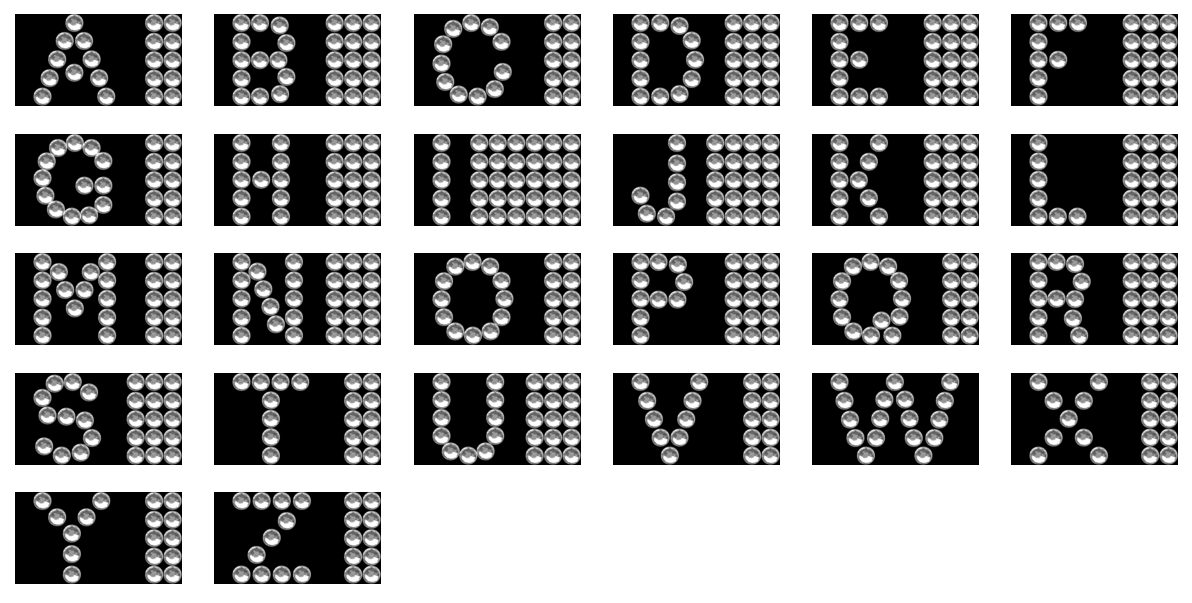

In [11]:
alphabet_right = []

char_max = "void"
dimx_max = 0
for draw in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
             'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']:
# loop over stone coordinates in letter and add stones to image
  dimy = 5 * 44
  dimx = 1 + int(np.ceil(44 * (1 + letters_new[draw][:,1].max()) - np.floor(letters_new[draw][:,1].min())))
  dimx_max = dimx if dimx > dimx_max else dimx_max
  char_max = draw if dimx > dimx_max else char_max

for draw in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
             'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']:
# loop over stone coordinates in letter and add stones to image
  dimy = 5 * 44
  dimx = 1 + int(np.ceil(44 * (1 + letters_new[draw][:,1].max()) - np.floor(letters_new[draw][:,1].min())))
  dimx_offset = dimx_max - dimx
  padding_columns = int(np.floor(dimx_offset/44.))
  print("Offsettting " + draw + " by {:d} pixels, will insert {:d} solid columns after letter".format(dimx_offset, padding_columns))
  new_img = np.zeros((dimy, dimx_max + 88, 3), dtype=int)
  for dot in range(letters_new[draw].shape[0]):
    doty, dotx = letters_new[draw][dot, :]
    for xx in range(44):
      for yy in range(44):
        new_img[int(44 * doty + yy), int(44 * dotx + xx) + 44, :] += flipped_stone[yy, xx, 0]
  for ii in range(padding_columns):
    for dot in range(letters_new['I'].shape[0]):
      doty, dotx = letters_new['I'][dot, :]
      for xx in range(44):
        for yy in range(44):
          new_img[int(44 * doty + yy), int(dimx_max - 44 * (ii) + dotx + xx) + 44, :] += flipped_stone[yy, xx, 0]
  new_img = np.flip(new_img, axis=0)
  alphabet_right.append(new_img)


fig, ax = plt.subplots(5, 6, figsize=(10,5), dpi=150)
for ii, letter in enumerate(alphabet_right):
  ax.flatten()[ii].imshow(letter)
  ax.flatten()[ii].axis('off')

for ii in range(26, 30):
  ax.flatten()[ii].axis('off')

plt.show()
plt.close('all')
#new_img = np.flip(new_img, axis=0)
#plt.imshow(new_img)
#cv2.imwrite(draw+".png", new_img)



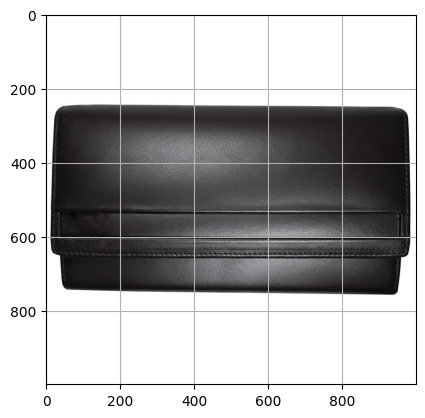

In [25]:
# get wallet img
req = urllib.request.urlopen("https://raw.githubusercontent.com/baeldin/strass_preview_generator/main/Damenboerse_ohneStrass_fixed.png")
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img_wallet = cv2.imdecode(arr, -1)
ax = plt.axes()
ax.imshow(img_wallet)
ax.grid()

13.2
69.39393939393939
Band has dimensions 916 x 66
(1000, 1000, 4)


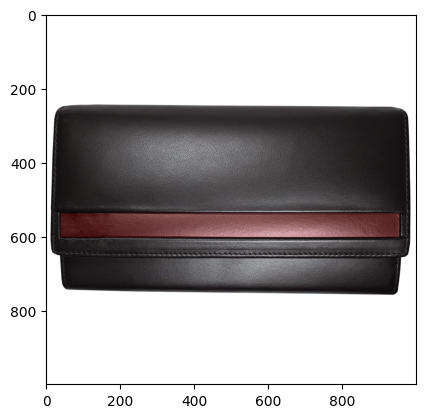

In [88]:
# VOID Coordinates
x_start = 40
x_end = 956
y_start = 538
y_end = 604

band_width = x_end - x_start
band_height = y_end - y_start

stone_size = band_height / 5.
print(stone_size)
print(band_width / stone_size)
print("Band has dimensions {:d} x {:d}".format(x_width, y_width))
wallet_marked = copy.copy(img_wallet)
wallet_marked[y_start:y_end, x_start:x_end] += np.array([50, 0, 0, 0]).astype(np.uint8)
plt.imshow(wallet_marked)
print(wallet_marked.shape)

In [85]:
def make_my_band(total_columns = 69, letter_indices = [0, 13]):

  letter_width = 2 * dimx_max + 3 * 44
  total_border = int(total_columns - letter_width / 44)

  left_space = int(np.floor(total_border/2))
  right_space = int(np.ceil(total_border/2))
  total_width = total_border + letter_width
  def make_border(N):
    print("Making border", N)
    border_img = np.zeros((dimy, int(N) * 44, 3), dtype=int)
    print(border_img.shape)
    for ii in range(N):
      for dot in range(letters_new['I'].shape[0]):
        doty, dotx = letters_new['I'][dot, :]
        for xx in range(44):
          for yy in range(44):
            border_img[int(44 * doty + yy), int(44 * ii + dotx + xx), :] += img_stone[yy, xx, :]
    return border_img

  left_border = make_border(left_space)
  # plt.imshow(left_border)
  right_border = make_border(right_space)
  # plt.imshow(right_border)


  img_full = cv2.hconcat([left_border, alphabet_left[letter_indices[0]], alphabet_right[letter_indices[1]], right_border])
  fig, ax = plt.subplots(1, 1, figsize=(24, 2))
  # ax.imshow(img_full)
  ax.axis('off')
  return img_full, left_border, right_border

Making border 25
(220, 1100, 3)
Making border 26
(220, 1144, 3)
Done


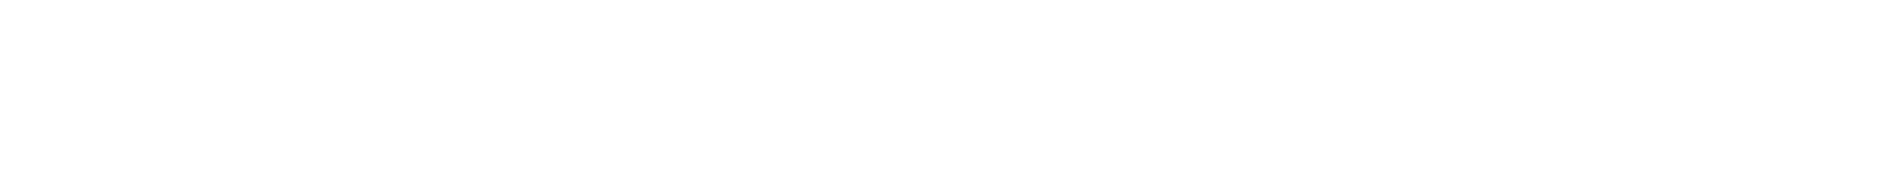

In [98]:
band_test, band_left, band_right = make_my_band()


def reshape_img_to_height(img, height):
  iy, ix, _ = img.shape
  scale_factor = float(height) / float(iy)
  small_dims = (int(ix * scale_factor), int(iy * scale_factor))
  img_smaller = cv2.resize(img.astype(float), small_dims, interpolation = cv2.INTER_AREA).astype(np.uint8)
  return(img_smaller)

left_start = [49, 538]
letter1_start = [49 + 330, 538]
letter2_start = [49 + 330 + 106, 538]
right_start = [49 + 330 + 106 + 119, 538]

def make_transparent_halo(img, place_xy):
  new_img = np.zeros([1000, 1000, 4], dtype=np.uint8)
  # new_img = copy.copy(img_wallet)
  ny, nx, _ = img.shape
  new_img[place_xy[1]:place_xy[1]+ny, place_xy[0]:place_xy[0]+nx, 0:3] = img
  new_img[place_xy[1]:place_xy[1]+ny, place_xy[0]:place_xy[0]+nx, 3] = 255
  return new_img

left_scaled = reshape_img_to_height(band_left, 66)
left_scaled_halo = make_transparent_halo(left_scaled, left_start)
right_scaled = reshape_img_to_height(band_right, 66)
right_scaled_halo = make_transparent_halo(right_scaled, right_start)
cv2.imwrite("img_out/left.png", left_scaled_halo)
cv2.imwrite("img_out/right.png", right_scaled_halo)

for ii in range(len(alphabet_left)):
  letter1_scaled = reshape_img_to_height(alphabet_left[ii], 66)
  letter1_scaled_halo = make_transparent_halo(letter1_scaled, letter1_start)
  cv2.imwrite("img_out/l_{:02d}.png".format(ii), letter1_scaled_halo)
  letter2_scaled = reshape_img_to_height(alphabet_right[ii], 66)
  letter2_scaled_halo = make_transparent_halo(letter2_scaled, letter2_start)
  cv2.imwrite("img_out/r_{:02d}.png".format(ii), letter2_scaled_halo)

print("Done")





In [99]:
!zip -r img.zip img_out/

  adding: img_out/ (stored 0%)
  adding: img_out/left.png (deflated 39%)
  adding: img_out/l_01.png (deflated 38%)
  adding: img_out/r_14.png (deflated 44%)
  adding: img_out/l_18.png (deflated 39%)
  adding: img_out/l_09.png (deflated 39%)
  adding: img_out/r_18.png (deflated 39%)
  adding: img_out/l_10.png (deflated 40%)
  adding: img_out/l_13.png (deflated 37%)
  adding: img_out/l_05.png (deflated 43%)
  adding: img_out/r_11.png (deflated 44%)
  adding: img_out/l_25.png (deflated 43%)
  adding: img_out/r_01.png (deflated 38%)
  adding: img_out/r_13.png (deflated 38%)
  adding: img_out/r_20.png (deflated 40%)
  adding: img_out/r_16.png (deflated 44%)
  adding: img_out/r_03.png (deflated 38%)
  adding: img_out/l_12.png (deflated 39%)
  adding: img_out/l_19.png (deflated 45%)
  adding: img_out/l_03.png (deflated 39%)
  adding: img_out/l_24.png (deflated 45%)
  adding: img_out/l_20.png (deflated 39%)
  adding: img_out/.ipynb_checkpoints/ (stored 0%)
  adding: img_out/l_11.png (deflated 